## 전국적 분석

### 전국 가맹점 수 시각화 

##### 경기도 남구,북구 분리 전

In [44]:
import requests
import json
import folium

In [22]:
%cd C:\python

C:\python


In [23]:
#문화누리 오프라인 가맹점 데이터

nuri_offline = pd.read_csv('datas/한국문화예술위원회_문화누리카드 오프라인 가맹점 목록_20211222.csv',encoding='cp949')
nuri_offline

,지역,가맹점명,분류,주소
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가)
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
...,...,...,...,...
23479,전북,SM스포츠,체육용품,전북 전주시 완산구 거아평로 145
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"
23481,경기,포토엔젤,미술,경기 성남시 수정구 탄리로 120번길 1
23482,서울,동서울터미널,교통수단,서울 광진구 강변역로 50


In [24]:
# 다운로드 받은 json 위치 데이터 호출 후 도시 이름 확인

In [27]:
with open("mini_project/SIDO_MAP_2022(1).json", 'r', encoding = "UTF-8") as json_file :
    json_kor = json.load(json_file)

In [ ]:
json_kor

In [30]:
nuri_offline.지역 = nuri_offline.지역.str[:-1] #

In [31]:
len(json_kor["features"])  # 17  /  지역 개수와 동일

18

In [32]:
for Feature in json_kor["features"]:
    print(Feature)
    break

# 서울특별시 좌표 확인

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.984, 37.636], [126.948, 37.657], [126.912, 37.644], [126.897, 37.589], [126.854, 37.574], [126.801, 37.59], [126.772, 37.548], [126.821, 37.541], [126.819, 37.479], [126.872, 37.485], [126.903, 37.434], [126.959, 37.439], [127.003, 37.467], [127.071, 37.432], [127.127, 37.469], [127.131, 37.468], [127.132, 37.468], [127.132, 37.469], [127.132, 37.47], [127.133, 37.471], [127.133, 37.472], [127.133, 37.474], [127.133, 37.475], [127.134, 37.475], [127.135, 37.474], [127.136, 37.474], [127.144, 37.474], [127.144, 37.475], [127.144, 37.476], [127.147, 37.477], [127.148, 37.482], [127.156, 37.488], [127.155, 37.488], [127.156, 37.489], [127.158, 37.489], [127.159, 37.49], [127.157, 37.49], [127.142, 37.516], [127.176, 37.575], [127.129, 37.566], [127.096, 37.689], [127.015, 37.701], [126.98, 37.656], [126.984, 37.636]]]}, 'properties': {'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}}


In [33]:
cities_name = [Feature["properties"]["CTP_KOR_NM"] for Feature in json_kor["features"]]
sorted(cities_name)

# json에 있는 도시 리스트

['강원도',
 '경기남',
 '경기북',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [35]:
# csv파일 지역 이름 -> json의 지역 이름으로 변환 - Dictionary 활용
city_dic = dict(nuri_offline.지역.value_counts())
city_dic

{'경기': 4256,
 '서울': 3279,
 '강원': 1715,
 '경북': 1677,
 '전북': 1493,
 '경남': 1471,
 '부산': 1371,
 '전남': 1323,
 '충남': 1130,
 '충북': 948,
 '광주': 937,
 '인천': 914,
 '대구': 874,
 '대전': 751,
 '제주': 736,
 '울산': 470,
 '세종': 139}

In [37]:
city_dic["경기도"] = city_dic.pop("경기")
city_dic["서울특별시"] = city_dic.pop("서울")
city_dic["강원도"] = city_dic.pop("강원")
city_dic["경상북도"] = city_dic.pop("경북")
city_dic["전라북도"] = city_dic.pop("전북")
city_dic["경상남도"] = city_dic.pop("경남")
city_dic["부산광역시"] = city_dic.pop("부산")
city_dic["전라남도"] = city_dic.pop("전남")
city_dic["충청남도"] = city_dic.pop("충남")
city_dic["충청북도"] = city_dic.pop("충북")
city_dic["광주광역시"] = city_dic.pop("광주")
city_dic["인천광역시"] = city_dic.pop("인천")
city_dic["대구광역시"] = city_dic.pop("대구")
city_dic["대전광역시"] = city_dic.pop("대전")
city_dic["제주특별자치도"] = city_dic.pop("제주")
city_dic["울산광역시"] = city_dic.pop("울산")
city_dic["세종특별자치시"] = city_dic.pop("세종")

In [38]:
city_dic

{'경기도': 4256,
 '서울특별시': 3279,
 '강원도': 1715,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 914,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139}

In [40]:
# .pop()메서드가 2개의 value를 합치지 못해 경기도의 value값을 직접 계산함
city_dic2 = {'경기도': 4253, '서울특별시': 3281, '강원도': 1714, '경상북도': 1677, '전라북도': 1493, '경상남도': 1471,
             '부산광역시': 1371, '전라남도': 1323, '충청남도': 1130, '충청북도': 948, '광주광역시': 937, '인천광역시': 915,
             '대구광역시': 874, '대전광역시': 751, '제주특별자치도': 736, '울산광역시': 470, '세종특별자치시': 139}
city_dic2

{'경기도': 4253,
 '서울특별시': 3281,
 '강원도': 1714,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 915,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139}

##### Data frame 만들기

In [42]:
city_counts_df = pd.DataFrame({"City": city_dic2.keys(),
                               "Count": city_dic2.values()})
city_counts_df

,City,Count
0,경기도,4253
1,서울특별시,3281
2,강원도,1714
3,경상북도,1677
4,전라북도,1493
5,경상남도,1471
6,부산광역시,1371
7,전라남도,1323
8,충청남도,1130
9,충청북도,948


##### 지도 그리기

In [45]:
# 지도 Setting
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(geo_data = json_kor,
                  data = city_counts_df, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "가맹점 수").add_to(m)

folium.LayerControl().add_to(m)
m

#### 경기남/경기북 분리한 그래프

In [46]:
# json파일 호출

In [47]:
import json

In [49]:
with open("mini_project/SIDO_MAP_2022(1).json", 'r', encoding = "UTF-8") as json_file :
    json_kor2 = json.load(json_file)

In [50]:
len(json_kor2["features"])  # 읽힘

18

In [51]:
cities_name2 = [Feature["properties"]["CTP_KOR_NM"] for Feature in json_kor2["features"]]
sorted(cities_name2)  # 확인용

['강원도',
 '경기남',
 '경기북',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [52]:
city_dic["경기남"] = city_dic.pop("경기도")
city_dic

{'서울특별시': 3279,
 '강원도': 1715,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 914,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139,
 '경기남': 4256}

In [ ]:
# Data frame 만들기

In [53]:
city_dic

{'서울특별시': 3279,
 '강원도': 1715,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 914,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139,
 '경기남': 4256}

In [54]:
city_counts_df2 = pd.DataFrame({"City": city_dic.keys(),
                               "Count": city_dic.values()})
city_counts_df2

,City,Count
0,서울특별시,3279
1,강원도,1715
2,경상북도,1677
3,전라북도,1493
4,경상남도,1471
5,부산광역시,1371
6,전라남도,1323
7,충청남도,1130
8,충청북도,948
9,광주광역시,937


In [55]:
# 최종 지도
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location = center, zoom_start = zoom)

folium.Choropleth(geo_data = json_kor2,
                  data = city_counts_df2, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "가맹점 수").add_to(m)

folium.LayerControl().add_to(m)
m

###  시/도 인구수와 지도 비교

In [56]:
population_dic = {'경기남': 10045663, '경기북': 3530304, '서울특별시': 9427583, '강원도': 1536498, '경상북도': 2594399, '전라북도': 1766254,
                  '경상남도': 3272381, '부산광역시': 3315516, '전라남도': 1814858, '충청남도': 2123625, '충청북도': 1593434, '광주광역시': 1428927,
                  '인천광역시': 2971888, '대구광역시': 2360662, '대전광역시': 1445875, '제주특별자치도': 677090, '울산광역시': 1108665, '세종특별자치시': 385285}
population_dic

# 2022.06 ~ 2023.02 사이 인구 데이터

{'경기남': 10045663,
 '경기북': 3530304,
 '서울특별시': 9427583,
 '강원도': 1536498,
 '경상북도': 2594399,
 '전라북도': 1766254,
 '경상남도': 3272381,
 '부산광역시': 3315516,
 '전라남도': 1814858,
 '충청남도': 2123625,
 '충청북도': 1593434,
 '광주광역시': 1428927,
 '인천광역시': 2971888,
 '대구광역시': 2360662,
 '대전광역시': 1445875,
 '제주특별자치도': 677090,
 '울산광역시': 1108665,
 '세종특별자치시': 385285}

In [57]:
population_df = pd.DataFrame({"City": population_dic.keys(),
                               "Count": population_dic.values()})
population_df

,City,Count
0,경기남,10045663
1,경기북,3530304
2,서울특별시,9427583
3,강원도,1536498
4,경상북도,2594399
5,전라북도,1766254
6,경상남도,3272381
7,부산광역시,3315516
8,전라남도,1814858
9,충청남도,2123625


In [58]:
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(geo_data = json_kor2,
                  data = population_df, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [300_000, 500_000, 1_000_000, 2_000_000, 3_000_000, 5_000_000, 7_000_000, 9_000_000, 10_100_000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "인구수").add_to(m)

folium.LayerControl().add_to(m)
m

C:\Users\user\anaconda3\lib\site-packages\branca\colormap.py:94: RuntimeWarning: overflow encountered in long_scalars
  self.color_domain = [self.vmin + (self.vmax-self.vmin) * k/499. for


#### folium marker 표시

In [61]:
# Data frame 만들고 전처리
import pandas as pd

ns = pd.read_csv("mini_project/누리샘플.csv")
ns

,Unnamed: 0,지역,가맹점명,분류,주소,Latitude,Longitude
0,21325,전남,오즈모텔,숙박,전라남도 영암군 신북면 금교로 11 로즈모텔,34.911211,126.701233
1,12622,경기,블랑호텔,숙박,경기 과천시 중앙로 131 현대빌딩 (중앙동),37.428338,126.991340
2,7549,경북,경산 용암웰빙스파,관광지,경북 경산시 압량면 금구길 23 (금구리),35.853715,128.764743
3,14121,충북,야생화느낌자수(궁중매듭공예),문화체험,충청북도 제천시 풍양로 108 중앙시장상가 2층 가동 104호,37.136624,128.211350
4,13335,인천,남동볼링센터,체육시설,"인천 남동구 인하로535번길 39 1,2층",37.444824,126.706146
...,...,...,...,...,...,...,...
957,12236,부산,화명스포렉스,체육시설,부산 북구 금곡대로285번길 13 B2201호볼링장,35.233722,129.012752
958,10605,전남,LG헬로비전 호남방송(케이블티비),영상,전남 목포시 하당로 115-158667,34.801647,126.414546
959,19443,인천,평화렛츠협동조합,문화체험,인천광역시 부평구 경인로1104번길 10 신협빌딩 지층,37.485314,126.742103
960,17050,서울,고투(GOTO) 청담점,체육시설,서울 강남구 학동로 88길 12 청진빌딩 B1,37.518300,127.052625


In [62]:
ns_mar = ns[["지역", "분류", "Latitude", "Longitude"]]
ns_mar

,지역,분류,Latitude,Longitude
0,전남,숙박,34.911211,126.701233
1,경기,숙박,37.428338,126.991340
2,경북,관광지,35.853715,128.764743
3,충북,문화체험,37.136624,128.211350
4,인천,체육시설,37.444824,126.706146
...,...,...,...,...
957,부산,체육시설,35.233722,129.012752
958,전남,영상,34.801647,126.414546
959,인천,문화체험,37.485314,126.742103
960,서울,체육시설,37.518300,127.052625


In [63]:
len(ns_mar)

962

#### 지도 생성 후 마커 표시

In [64]:
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location = center, zoom_start = 7)
m

for i in ns_mar.index:
    reg = ns_mar.loc[i, '지역']
    cat = ns_mar.loc[i, '분류']
    lat = ns_mar.loc[i, 'Latitude']
    lon = ns_mar.loc[i, 'Longitude']
    marker = folium.Marker([lat, lon], popup = reg).add_to(m)
m

#### 지역에 따라 marker 색깔 변경

In [65]:
ns_mar["지역"].unique()

array(['전남', '경기', '경북', '충북', '인천', '광주', '제주', '서울', '강원', '대구', '충남',
       '부산', '경남', '전북', '울산', '대전', '세종'], dtype=object)

In [66]:
m2 = folium.Map(location = [36.5, 127.5], zoom_start = 7)

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m2)

for lat, lon in zip(ns_mar.Latitude, ns_mar.Longitude):
    folium.Marker([lat, lon]).add_to(marker_cluster)
m2

## 지역적 분석

### 지역별 여가활동과 문화누리카드 가맹점 비교

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%cd C:\python

C:\python


#### 문화누리카드 오프라인 가맹점 데이터

In [3]:
#문화누리카드 오프라인 가맹점 데이터

nuri_offline = pd.read_csv('datas/한국문화예술위원회_문화누리카드 오프라인 가맹점 목록_20211222.csv',encoding='cp949')
nuri_offline

,지역,가맹점명,분류,주소
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가)
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
...,...,...,...,...
23479,전북,SM스포츠,체육용품,전북 전주시 완산구 거아평로 145
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"
23481,경기,포토엔젤,미술,경기 성남시 수정구 탄리로 120번길 1
23482,서울,동서울터미널,교통수단,서울 광진구 강변역로 50


In [4]:
len(nuri_offline)   #전체 자료수

23484

In [5]:
nuri_offline.isna().sum() #결측치 존재 X

지역      0
가맹점명    0
분류      0
주소      0
dtype: int64

In [6]:
#지역별 자료수
nuri_offline.지역.value_counts()

경기     4256
서울     3279
강원     1715
경북     1677
전북     1493
경남     1471
부산     1371
전남     1323
충남     1130
충북      948
광주      937
인천      914
대구      874
대전      751
제주      736
울산      470
세종      139
Name: 지역, dtype: int64

In [7]:
#분류별 자료수
nuri_offline.분류.value_counts()

미술       4069
숙박       3796
도서       3631
체육시설     2511
체육용품     2008
문화체험     1681
교통수단     1502
관광지      1391
여행사      1053
영상        658
공연        630
음악        503
스포츠관람      51
Name: 분류, dtype: int64

In [8]:
#지역 column 고유값 확인
nuri_offline['지역'].unique()

array(['전북 ', '제주 ', '전남 ', '부산 ', '충남 ', '광주 ', '대전 ', '대구 ', '충북 ',
       '울산 ', '경기 ', '서울 ', '인천 ', '경북 ', '강원 ', '세종 ', '경남 '],
      dtype=object)

In [9]:
#지역 이름 뒤에 띄어쓰기 제거
nuri_offline['지역'] = nuri_offline['지역'].str[:-1]

In [10]:
#분류 column 고유값 확인
nuri_offline["분류"].unique()

array(['공연', '숙박', '미술', '도서', '여행사', '교통수단', '문화체험', '관광지', '음악', '영상',
       '체육시설', '체육용품', '스포츠관람'], dtype=object)

#### 1년동안 가장 많이 한 여가활동

In [11]:
#1년 동안 가장 많이 참여한 여가 활동 데이터 불러오기
culture = pd.read_csv('datas/지난_1년_동안_가장_많이_참여한_여가활동__1순위__중분류_20230320002311.csv',encoding='cp949')
culture

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,통계분류(1),통계분류(2),표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,전체,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,성별,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,성별,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,17개 시도별,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,17개 시도별,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,17개 시도별,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,17개 시도별,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,17개 시도별,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,17개 시도별,대전,460,-,-,-,1.3,-,18.2,78.4,2.1


In [12]:
culture.columns

Index(['통계분류(1)', '통계분류(2)', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8'],
      dtype='object')

In [13]:
del culture["통계분류(1)"]

In [14]:
culture.head()

,통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,통계분류(2),표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9


In [15]:
#column명 변경
culture.columns=['분류', '표본수', '문화예술관람활동', '문화예술참여활동', '스포츠관람활동','스포츠참여활동', '관광활동', '취미오락활동', '휴식활동', '사회및 기타활동']

In [16]:
#첫 행 제거
culture=culture.loc[1:,:]
culture

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,대전,460,-,-,-,1.3,-,18.2,78.4,2.1
10,울산,390,-,-,1,2.6,0.1,15.7,61.6,18.9


#### 가맹점 분류를 여가활동 카테고리로 수정
- 미술 columm에서 사진,표구 데이터 분리

    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

#### 미술 분류 중에서 사진,표구 분류

In [17]:
#분류 기준 단어
cat_photo = ["스튜디오", "사진", "포토", "photo"] 
cat_pen = ['문구','표구']

In [18]:
#기준 단어를 포함하는 사진 데이터 확인
art = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_photo]
art

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480     True
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4         True
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4         True
          ...  
 23479    False
 23480    False
 23481     True
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool]

In [19]:
##기준 단어를 포함하는 표구 데이터 확인
pen = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_pen]
pen

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23479    False
 23480    False
 23481    False
 23482    False
 23483    False
 Name: 가맹점명, Length: 23484, dtype: bool]

In [20]:
#하나라도 True이면 True
art_bool = art[0]
for a in art:
    art_bool = art_bool|a  

In [21]:
#하나라도 True이면 True
pen_bool = pen[0]
for p in pen:
    pen_bool = pen_bool|p  

In [22]:
art_bool

0        False
1        False
2        False
3        False
4         True
         ...  
23479    False
23480     True
23481     True
23482    False
23483    False
Name: 가맹점명, Length: 23484, dtype: bool

In [23]:
pen_bool

0        False
1        False
2        False
3        False
4        False
         ...  
23479    False
23480    False
23481    False
23482    False
23483    False
Name: 가맹점명, Length: 23484, dtype: bool

In [24]:
#사진 데이터 bool인덱싱 
photo_result = nuri_offline[art_bool][nuri_offline[art_bool]['분류']=='미술']
photo_result

,지역,가맹점명,분류,주소
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
10,전남,허바허바사진관,미술,전남 여수시 동문로 46
12,전남,금화스튜디오,미술,전남 여수시 충민로 280-1
15,전남,대한칼라스튜디오,미술,전남 여수시 중앙로 38
18,전남,에덴스튜디오,미술,전남 여수시 신월로 675-1
...,...,...,...,...
23436,경남,KIM스튜디오,미술,경남 창원시 성산구 원이대로 652 롯데빌딩 2층 202호
23446,서울,청사진관,미술,서울 양천구 중앙로 253 남도빌딩 6층
23454,전북,갤러리S/T현상소(사진관),미술,전라북도 군산시 황룡2길 8 갤러리현상소
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"


In [25]:
#표구 데이터 bool 인덱싱
pen_result = nuri_offline[pen_bool][nuri_offline[pen_bool]['분류']=='미술']
pen_result

,지역,가맹점명,분류,주소
11,전남,동양표구사,미술,전라남도 여수시 하멜로 12
127,충남,둘레표구사,미술,충남 논산시 강경읍 남교리81
165,부산,복인당 화랑 표구사,미술,부산 기장군 장안읍 좌천리 249-1 복인당표구사
303,광주,진도표구사,미술,광주 동구 문화전당로 14 (남동)
660,대구,대구화방문구,미술,대구광역시 남구 명덕로36길 32
...,...,...,...,...
23112,서울,문구포유 노원지점,미술,서울특별시 노원구 상계로3길 15 현우빌딩 지층
23117,강원,우리문구완구,미술,강원도 인제군 북면 원통로 182
23127,경기,학생화방문구센터,미술,경기도 부천시 부천로24번길 3
23140,서울,스카이문구,미술,서울특별시 성북구 성북로4길 52 한신한진아파트 스카이프라자 동광 547호


In [26]:
#분류 이름 사진,표구로 변경
nuri_offline.loc[photo_result.index, "분류"] = "사진"
nuri_offline.loc[pen_result.index, "분류"] = "표구"

In [27]:
#분류가 사진인 데이터 확인
nuri_offline[nuri_offline["분류"]=="사진"]

,지역,가맹점명,분류,주소
4,전북,포토젠(사진관),사진,전북 전주시 완산구 전주객사4길 24-17
10,전남,허바허바사진관,사진,전남 여수시 동문로 46
12,전남,금화스튜디오,사진,전남 여수시 충민로 280-1
15,전남,대한칼라스튜디오,사진,전남 여수시 중앙로 38
18,전남,에덴스튜디오,사진,전남 여수시 신월로 675-1
...,...,...,...,...
23436,경남,KIM스튜디오,사진,경남 창원시 성산구 원이대로 652 롯데빌딩 2층 202호
23446,서울,청사진관,사진,서울 양천구 중앙로 253 남도빌딩 6층
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층"


In [28]:
#분류가 표구인 데이터 확인
nuri_offline[nuri_offline["분류"]=="표구"]

,지역,가맹점명,분류,주소
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12
127,충남,둘레표구사,표구,충남 논산시 강경읍 남교리81
165,부산,복인당 화랑 표구사,표구,부산 기장군 장안읍 좌천리 249-1 복인당표구사
303,광주,진도표구사,표구,광주 동구 문화전당로 14 (남동)
660,대구,대구화방문구,표구,대구광역시 남구 명덕로36길 32
...,...,...,...,...
23112,서울,문구포유 노원지점,표구,서울특별시 노원구 상계로3길 15 현우빌딩 지층
23117,강원,우리문구완구,표구,강원도 인제군 북면 원통로 182
23127,경기,학생화방문구센터,표구,경기도 부천시 부천로24번길 3
23140,서울,스카이문구,표구,서울특별시 성북구 성북로4길 52 한신한진아파트 스카이프라자 동광 547호


In [29]:
nuri_offline.분류.value_counts()

숙박       3796
도서       3631
체육시설     2511
사진       2388
체육용품     2008
문화체험     1681
교통수단     1502
미술       1458
관광지      1391
여행사      1053
영상        658
공연        630
음악        503
표구        223
스포츠관람      51
Name: 분류, dtype: int64

##### 카테고리 분류
    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

In [30]:
#분류 기준 단어
c_w = ["영상","공연","미술"] 
c_j = ['문화체험','표구']
sp_w = ['스포츠관람']
sp_j = ['체육용품','체육시설']
tr = ['관광지','여행사','교통수단','숙박']
rest = ['음악']
hob = ['도서','사진']

In [71]:
#문화예술관람 카테고리 분류
cul_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_w ]

#하나라도 True이면 True
cul_w_bool = cul_w[0]
for c in cul_w:
    cul_w_bool = cul_w_bool|c  
    
df_cul_w = nuri_offline[cul_w_bool].copy()    #복사본에서 사용하겠다.
df_cul_w['국민여가'] = ['문화예술관람' for i in range(2746)]
df_cul_w
    

,지역,가맹점명,분류,주소,국민여가
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가),문화예술관람
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가),문화예술관람
5,제주,제주스카이워터쇼,공연,제주 제주시 구좌읍 번영로 2172-80,문화예술관람
39,전북,서신갤러리,미술,전라북도 전주시 완산구 서신로 38 새터빌딩 지하 1층 서신갤러리,문화예술관람
51,전북,수지미술관,미술,"전라북도 남원시 수지면 물머리로 525 비둘기학교 ,수지미술관",문화예술관람
...,...,...,...,...,...
23428,전북,담소예술교육문화원,미술,전라북도 고창군 고창읍 모양성로 96 (유)신흥운수 1층,문화예술관람
23460,서울,수민예,미술,서울특별시 종로구 인사동길 34-1 인사아트플라자 1층 126호,문화예술관람
23461,서울,(주)댄스아트라인(공연),공연,서울 성북구 동소문로23길 8-12 지안빌딩 5층,문화예술관람
23476,전남,개명선물의집,미술,전라남도 완도군 금일읍 금일로 400,문화예술관람


In [32]:
cul_w_bool.sum()

2746

In [72]:
#문화예술참여 카테고리 분류
cul_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_j ]

#하나라도 True이면 True
cul_j_bool = cul_j[0]
for c in cul_j:
    cul_j_bool = cul_j_bool|c  
    
df_cul_j = nuri_offline[cul_j_bool].copy()
df_cul_j['국민여가'] = ['문화예술참여' for i in range(1904)]
df_cul_j
    

,지역,가맹점명,분류,주소,국민여가
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12,문화예술참여
28,전북,흙마을도예,문화체험,전라북도 남원시 주천면 원천로 420-5,문화예술참여
41,전북,고운한지공예,문화체험,전라북도 전주시 완산구 서학1길 38-3,문화예술참여
76,전남,올리브그린,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 올리브그린,문화예술참여
77,전남,아트앤샵수,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 아트앤샵수,문화예술참여
...,...,...,...,...,...
23462,전북,네이처휴(수공예),문화체험,"전북 전주시 완산구 현무1길20, 1층 3호",문화예술참여
23463,경북,명주이야기,문화체험,경상북도 상주시 함창읍 무운로 1633,문화예술참여
23468,경기,심곡3동 주민센터,문화체험,"경기 부천시 부일로 393, 1층(심곡동)",문화예술참여
23472,경북,바비샵 엔 공방,문화체험,경상북도 청송군 청송읍 금월로 274,문화예술참여


In [34]:
nuri_offline[cul_j_bool]

,지역,가맹점명,분류,주소
11,전남,동양표구사,표구,전라남도 여수시 하멜로 12
28,전북,흙마을도예,문화체험,전라북도 남원시 주천면 원천로 420-5
41,전북,고운한지공예,문화체험,전라북도 전주시 완산구 서학1길 38-3
76,전남,올리브그린,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 올리브그린
77,전남,아트앤샵수,문화체험,전라남도 순천시 행금길 9-2 한방생활건강 아트앤샵수
...,...,...,...,...
23462,전북,네이처휴(수공예),문화체험,"전북 전주시 완산구 현무1길20, 1층 3호"
23463,경북,명주이야기,문화체험,경상북도 상주시 함창읍 무운로 1633
23468,경기,심곡3동 주민센터,문화체험,"경기 부천시 부일로 393, 1층(심곡동)"
23472,경북,바비샵 엔 공방,문화체험,경상북도 청송군 청송읍 금월로 274


In [35]:
cul_j_bool.sum()

1904

In [74]:
#스포츠관람 카테고리 분류
sports_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_w ]

#하나라도 True이면 True
sports_w_bool = sports_w[0]
for c in sports_w:
    sports_w_bool = sports_w_bool|c  
    
df_sports_w = nuri_offline[sports_w_bool].copy()
df_sports_w['국민여가'] = ['스포츠관람' for i in range(51)]
df_sports_w
    

,지역,가맹점명,분류,주소,국민여가
11635,인천,인천 Utd(인천축구전용경기장),스포츠관람,인천광역시 중구 참외전로 246,스포츠관람
11746,경기,러시앤캐시 베스피드 (안산상록수체육관),스포츠관람,경기 안산시 상록구 용신로 422 (본오동),스포츠관람
13696,광주,광주FC (광주시민 프로 축구단),스포츠관람,광주 서구 금화로 240 월드컵경기장 (풍암동),스포츠관람
14041,서울,웨슬리퀘스트 의정부 KB손해보험 스타즈(의정부실내체육관),스포츠관람,경기도 의정부시 체육로 90 의정부실내체육관,스포츠관람
14042,서울,웨슬리퀘스트 서울 우리카드 위비(서울장충체육관),스포츠관람,서울특별시 중구 동호로 241 장충체육관,스포츠관람
14114,경기,웨슬리퀘스트 IBK기업은행 알토스(화성종합경기타운),스포츠관람,경기도 화성시 향남읍 향남로 470 화성종합경기타운 화성종합경기타운 매표소,스포츠관람
14291,서울,웨슬리퀘스트 인천 흥국생명핑크스파이더스(인천계양체육관),스포츠관람,인천광역시 계양구 봉오대로 855 서운체육공원,스포츠관람
14300,서울,웨슬리퀘스트 안산 OK저축은행 러쉬앤케시(안산상록수체육관),스포츠관람,경기도 안산시 상록구 용신로 422 상록수체육관,스포츠관람
14397,경기,웨슬리퀘스트 수원 한국전력빅스톰(수원실내체육관),스포츠관람,경기도 수원시 권선구 서수원로577번길 171,스포츠관람
14398,강원,강원FC(강릉 종합운동장),스포츠관람,강원도 강릉시 종합운동장길 69 강릉종합운동장,스포츠관람


In [37]:
sports_w_bool.sum()

51

In [75]:
#스포츠참여 카테고리 분류
sports_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_j ]

#하나라도 True이면 True
sports_j_bool = sports_j[0]
for c in sports_j:
    sports_j_bool = sports_j_bool|c  
    
df_sports_j = nuri_offline[sports_j_bool].copy()
df_sports_j['국민여가'] = ['스포츠참여' for i in range(4519)]
df_sports_j
    

,지역,가맹점명,분류,주소,국민여가
661,대구,대구사격장(대구시설공단),체육시설,대구 북구 문주길 170,스포츠참여
824,경기,의정부 스포츠센터,체육시설,"경기 의정부시 장곡로 101, 의정부스포츠센터",스포츠참여
825,경기,의정부시설관리공단(빙상장),체육시설,경기 의정부시 체육로136,스포츠참여
829,인천,삼천리자전거 원당점,체육용품,인천광역시 서구 고산후로 97 희성프라자,스포츠참여
830,인천,삼천리자전거검단점,체육용품,인천광역시 서구 완정로 11 진수빌딩 1층,스포츠참여
...,...,...,...,...,...
23459,경기,플라잉요가 MJ studio,체육시설,경기도 시흥시 복지로 90 CGV 5층 502호,스포츠참여
23474,경북,익스트리영천점,체육용품,경북 영천시 호국로 28-1,스포츠참여
23475,전북,호남스포츠,체육용품,전북 전주시 완산구 전주객사5길 73-7,스포츠참여
23477,경북,구봉레저스포츠,체육용품,경북 의성군 의성읍 중리리 713-28,스포츠참여


In [39]:
sports_j_bool.sum()

4519

In [76]:
#관광활동 카테고리 분류
travel= [nuri_offline["분류"].str.lower().str.contains(word) for word in tr ]

#하나라도 True이면 True
travel_bool = travel[0]
for c in travel:
    travel_bool = travel_bool|c  
    
df_travel = nuri_offline[travel_bool].copy()
df_travel['국민여가'] = ['관광활동' for i in range(7742)]
df_travel
    

,지역,가맹점명,분류,주소,국민여가
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5,관광활동
6,제주,패밀리하우스,숙박,제주 제주시 구좌읍 상도로 3,관광활동
7,제주,와락게스트하우스,숙박,제주 제주시 구좌읍 세평항로 45-4,관광활동
8,제주,담너머그곳에,숙박,제주 제주시 구좌읍 하도3길 108,관광활동
9,전남,리츠모텔,숙박,전남 여수시 거북선공원1길 8 (학동),관광활동
...,...,...,...,...,...
23467,제주,화조원,관광지,제주시 애월읍 애원로 804,관광활동
23469,경기,엘가관광호텔,숙박,경기 화성시 향남읍 평6길 46-1,관광활동
23471,제주,제주로렌트카,교통수단,제주시 오일장중길 128,관광활동
23478,경기,아침풍경팬션,숙박,경기 가평군 상면 임초리 370-2,관광활동


In [41]:
travel_bool.sum()

7742

In [77]:
#휴식활동 카테고리 분류
rest_cat= [nuri_offline["분류"].str.lower().str.contains(word) for word in rest ]

#하나라도 True이면 True
rest_bool = rest_cat[0]
for c in rest_cat:
    rest_bool = rest_bool|c  
    
df_rest = nuri_offline[rest_bool].copy()
    

In [78]:
df_rest['국민여가']=['휴식활동' for i in range(503)]      
df_rest

,지역,가맹점명,분류,주소,국민여가
74,전남,세광음악사,음악,전남 순천시 해룡면 조례못등길 94,휴식활동
75,전남,세광레코드,음악,전남 순천시 해룡면 상삼리640-6,휴식활동
107,전북,명성악기사,음악,전북 전주시 완산구 다가동3가81-1,휴식활동
175,부산,팬레코드,음악,부산 남구 대연5동 329-18번지 1층,휴식활동
292,광주,광주선경미디어상사,음악,광주 동구 금남로5가1-5 전자랜드 119호,휴식활동
...,...,...,...,...,...
23397,경남,베를린기타전문학원,음악,경상남도 창원시 성산구 창이대로881번길 11 신대방빌딩 402호,휴식활동
23400,부산,비틀즈레코드,음악,부산 북구 백양대로 1196,휴식활동
23412,서울,서울레코드,음악,서울 종로구 종로154 (종로3가),휴식활동
23437,경북,대전소리사,음악,경북 경주시 황오동 215-9,휴식활동


In [44]:
rest_bool.sum()

503

In [79]:
#취미오락 카테고리 분류
hobby= [nuri_offline["분류"].str.lower().str.contains(word) for word in hob ]

#하나라도 True이면 True
hobby_bool = hobby[0]
for c in hobby:
    hobby_bool = hobby_bool|c  
    
df_hobby = nuri_offline[hobby_bool].copy()
df_hobby['국민여가'] = ['취미오락' for i in range(6019)]
df_hobby
    

,지역,가맹점명,분류,주소,국민여가
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림,취미오락
4,전북,포토젠(사진관),사진,전북 전주시 완산구 전주객사4길 24-17,취미오락
10,전남,허바허바사진관,사진,전남 여수시 동문로 46,취미오락
12,전남,금화스튜디오,사진,전남 여수시 충민로 280-1,취미오락
15,전남,대한칼라스튜디오,사진,전남 여수시 중앙로 38,취미오락
...,...,...,...,...,...
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소,취미오락
23464,경북,무한대서적,도서,경상북도 포항시 북구 장량로 183,취미오락
23465,경기,행복한서적(로데오점),도서,"경기 시흥시 중심상가3길 12, 지하층102호(정왕동)",취미오락
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층",취미오락


In [80]:
len(df_hobby)

6019

In [81]:
#데이터 프레임 합치기
result_df = pd.concat([df_cul_w,df_cul_j,df_sports_w,df_sports_j,df_travel,df_rest,df_hobby])
result_df.국민여가.unique()

array(['문화예술관람', '문화예술참여', '스포츠관람', '스포츠참여', '관광활동', '휴식활동', '취미오락'],
      dtype=object)

##### 국민여가 column 추가된 데이터프레임

In [48]:
result_df

,지역,가맹점명,분류,주소,국민여가
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가),문화예술관람
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가),문화예술관람
5,제주,제주스카이워터쇼,공연,제주 제주시 구좌읍 번영로 2172-80,문화예술관람
39,전북,서신갤러리,미술,전라북도 전주시 완산구 서신로 38 새터빌딩 지하 1층 서신갤러리,문화예술관람
51,전북,수지미술관,미술,"전라북도 남원시 수지면 물머리로 525 비둘기학교 ,수지미술관",문화예술관람
...,...,...,...,...,...
23454,전북,갤러리S/T현상소(사진관),사진,전라북도 군산시 황룡2길 8 갤러리현상소,취미오락
23464,경북,무한대서적,도서,경상북도 포항시 북구 장량로 183,취미오락
23465,경기,행복한서적(로데오점),도서,"경기 시흥시 중심상가3길 12, 지하층102호(정왕동)",취미오락
23480,서울,자연스튜디오,사진,"서울 은평구 연서로29길 7, 1층",취미오락


### 시각화

In [82]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

D2Coding
Gowun Batang
Noto Sans KR
Noto Sans KR
D2Coding
Noto Sans KR
Gowun Batang
Noto Sans KR
Noto Sans KR
Noto Sans KR


In [83]:
global_font = {'family':'D2Coding','size' : 12 , 'weight':'bold'}

#폰트 설정
mpl.rc('font',**global_font)

#유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus=False)

#주피터 내부에 그림 표시 (magic명령)
%matplotlib inline

In [84]:
#폰트 설정
mpl.rcParams['font.family'] = 'D2Coding'
print(mpl.rcParams['font.family'])

['D2Coding']


In [88]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

In [86]:
#그래프 배경 설정
import seaborn as sns
sns.set_theme(style='whitegrid')

#### 국민여가별 가맹점 비율 그래프(각각)

In [ ]:
for cat in result_df["국민여가"].unique():
    data = result_df[result_df["국민여가"] == cat]["지역"].value_counts(True) * 100
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{cat} 활동의 지역별 가맹점 비율')
    sns.barplot(x=data.index,y=data.values)

#### 지역별 가맹점 비율 그래프(각각)

In [91]:
data.index

Index(['경기', '서울', '부산', '경북', '경남', '전북', '대구', '인천', '전남', '대전', '충남', '광주',
       '강원', '충북', '울산', '제주', '세종'],
      dtype='object')

In [ ]:
for geo in result_df["지역"].unique():
    data = result_df[result_df["지역"] == geo]["국민여가"].value_counts(True) * 100
    
    colors = {"관광활동":'lightsalmon','취미오락':'khaki', '스포츠참여':'lightpink', 
              '문화예술참여':'darkseagreen', '문화예술관람':'skyblue', '휴식활동':'bisque', '스포츠관람':'mediumvioletred'}
    
    plt.figure(figsize=(12, 12))
    plt.title(f'{geo} 지역별 가맹점 비율', fontsize = 20)
    plt.bar(x=data.index,height=data.values,color=[colors[c] for c in data.index])
    plt.savefig('nuri_img_{}'.format(geo))
    plt.show()

In [93]:
data_total =culture.iloc[0,2:].sort_values(ascending=False)
data_total

휴식활동        61.5
스포츠참여활동      6.5
사회및 기타활동     5.2
취미오락활동      21.4
문화예술관람활동     1.7
스포츠관람활동      1.7
관광활동         1.3
문화예술참여활동     0.6
Name: 1, dtype: object

In [95]:
#그래프 스타일 조회
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [96]:
culture

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
1,소계,10049,1.7,0.6,1.7,6.5,1.3,21.4,61.5,5.2
2,남성,4972,1.6,0.4,3.2,7.8,1.3,25.3,55.7,4.8
3,여성,5077,1.7,0.9,0.2,5.3,1.4,17.4,67.4,5.7
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,대전,460,-,-,-,1.3,-,18.2,78.4,2.1
10,울산,390,-,-,1,2.6,0.1,15.7,61.6,18.9


In [97]:
culture_geo = culture.iloc[3:,:]

In [98]:
culture_geo

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,대전,460,-,-,-,1.3,-,18.2,78.4,2.1
10,울산,390,-,-,1,2.6,0.1,15.7,61.6,18.9
11,세종,201,-,-,1.2,2.4,0.7,12.2,81.9,1.5
12,경기,1316,3.5,0.7,2,7.6,2,23.8,55.4,5
13,강원,475,0.8,0.6,2.8,7.7,1.1,22.1,60.9,3.9


In [99]:
culture_geo.분류.unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [100]:
len(culture_geo)

17

In [102]:
#-을 0으로 변경
culture_geo.replace('-',0)

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,0,0.5,0.6,7.9,0,15,62.5,13.5
6,대구,580,0,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1
9,대전,460,0,0,0,1.3,0,18.2,78.4,2.1
10,울산,390,0,0,1,2.6,0.1,15.7,61.6,18.9
11,세종,201,0,0,1.2,2.4,0.7,12.2,81.9,1.5
12,경기,1316,3.5,0.7,2,7.6,2,23.8,55.4,5
13,강원,475,0.8,0.6,2.8,7.7,1.1,22.1,60.9,3.9


#### 국민여가 파이차트

In [66]:
culture3 = culture.iloc[3:]
culture3.head()

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1


In [ ]:
#그래프 색상

for cname, hex in mpl.colors.cnames.items():
    print(cname,hex)

In [105]:
 colors = {"관광활동":'lightsalmon','취미오락':'khaki', '스포츠참여':'lightpink', 
              '문화예술참여':'darkseagreen', '문화예술관람':'skyblue', '휴식활동':'plum', '스포츠관람':'mediumvioletred'}

In [ ]:
culture3 = culture.iloc[3:]

culture3 = culture3.set_index('분류')

culture3.replace('-', 0, inplace=True)
del culture3['표본수']
 
colors = ['#87CEEB', '#8FBC8F', '#DDA0DD', '#FFB6C1','#FFA07A','#F0E68C','#FFE4C4','#D3D3D3']
wedgeprops={'width': 0.7}

for i in culture3.index:
    plt.figure(figsize=(13, 10))
    plt.pie(culture3.loc[i].values,
            labels = culture3.loc[i].index,
            colors = colors,
            explode=[ 0.01 for _ in range(len(culture3.loc[i].index))],
            wedgeprops=wedgeprops,
            textprops={'fontsize': 12}, # text font size
            autopct='%1.1f%%')
    plt.title(f'1년동안 가장 많이 한 여가활동 - {i}',fontsize=20)
    plt.axis('equal')
    #plt.style.use('')
    plt.legend()
    plt.savefig('cul_img_{}'.format(i))  #그래프 파일 저장
    plt.show()

    
plt.show()

#### 누적 그래프

In [111]:
#지역별로 분류 비율 추가하기
result= []
for cat in nuri_offline["지역"].unique():
    data = nuri_offline[nuri_offline["지역"] == cat]["분류"].value_counts(True).to_frame() *100
    data["지역"] = cat
    result.append(data)   

In [112]:
final = pd.concat(result).reset_index()

In [113]:
final

,index,분류,지역
0,숙박,20.227729,전북
1,도서,14.266577,전북
2,문화체험,10.917616,전북
3,사진,8.908238,전북
4,체육용품,8.305425,전북
...,...,...,...
247,영상,2.787220,경남
248,공연,2.107410,경남
249,음악,1.767505,경남
250,표구,0.679810,경남


In [114]:
#column명 재설정
final.columns = ["분류", "비율", "지역"]

In [115]:
#지역별 분류 비율 포함한 데이터프레임 
final

,분류,비율,지역
0,숙박,20.227729,전북
1,도서,14.266577,전북
2,문화체험,10.917616,전북
3,사진,8.908238,전북
4,체육용품,8.305425,전북
...,...,...,...
247,영상,2.787220,경남
248,공연,2.107410,경남
249,음악,1.767505,경남
250,표구,0.679810,경남


In [116]:
#비율의 총합이 100인지 확인
final.groupby(by="지역").sum()

,비율
지역,
강원,100.0
경기,100.0
경남,100.0
경북,100.0
광주,100.0
대구,100.0
대전,100.0
부산,100.0
서울,100.0


<AxesSubplot:xlabel='비율', ylabel='분류'>

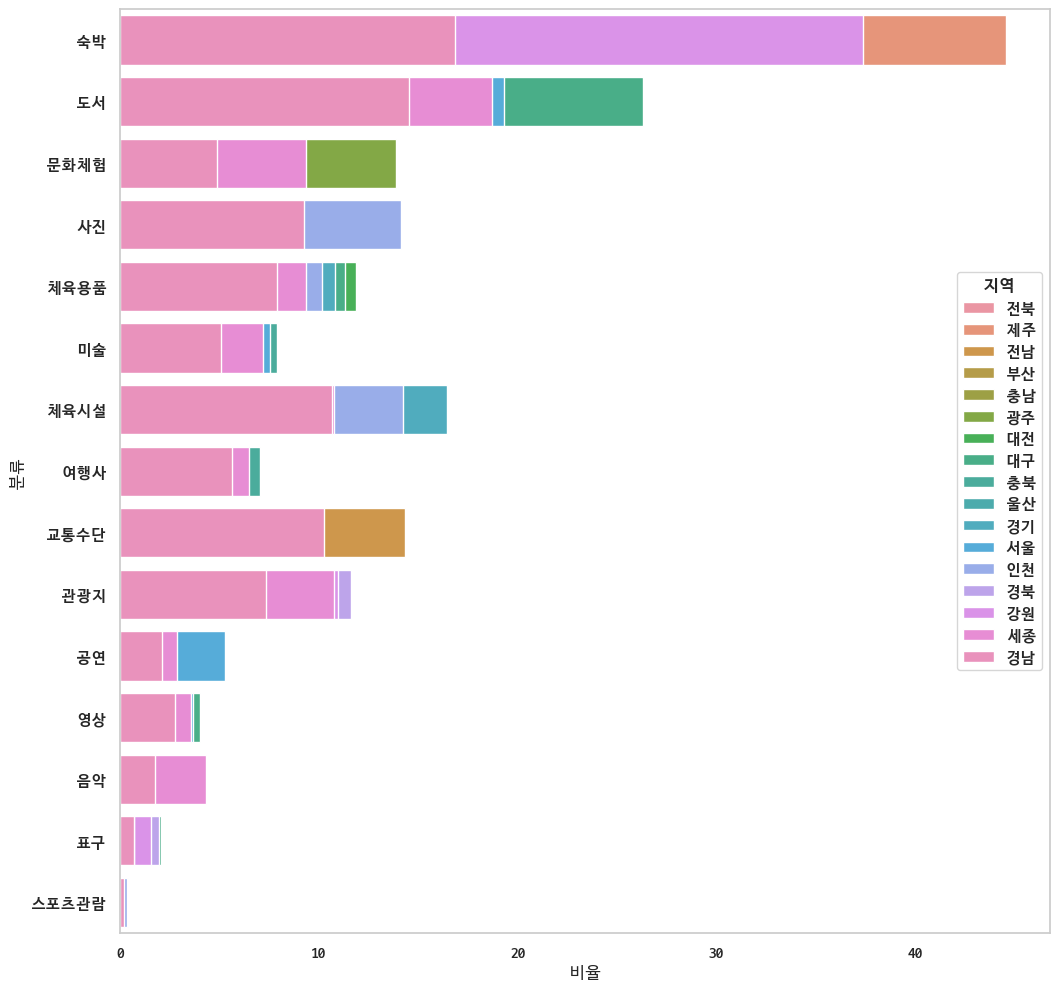

In [117]:
#분류별 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="분류", x="비율", hue="지역", dodge=False)

<AxesSubplot:xlabel='비율', ylabel='지역'>

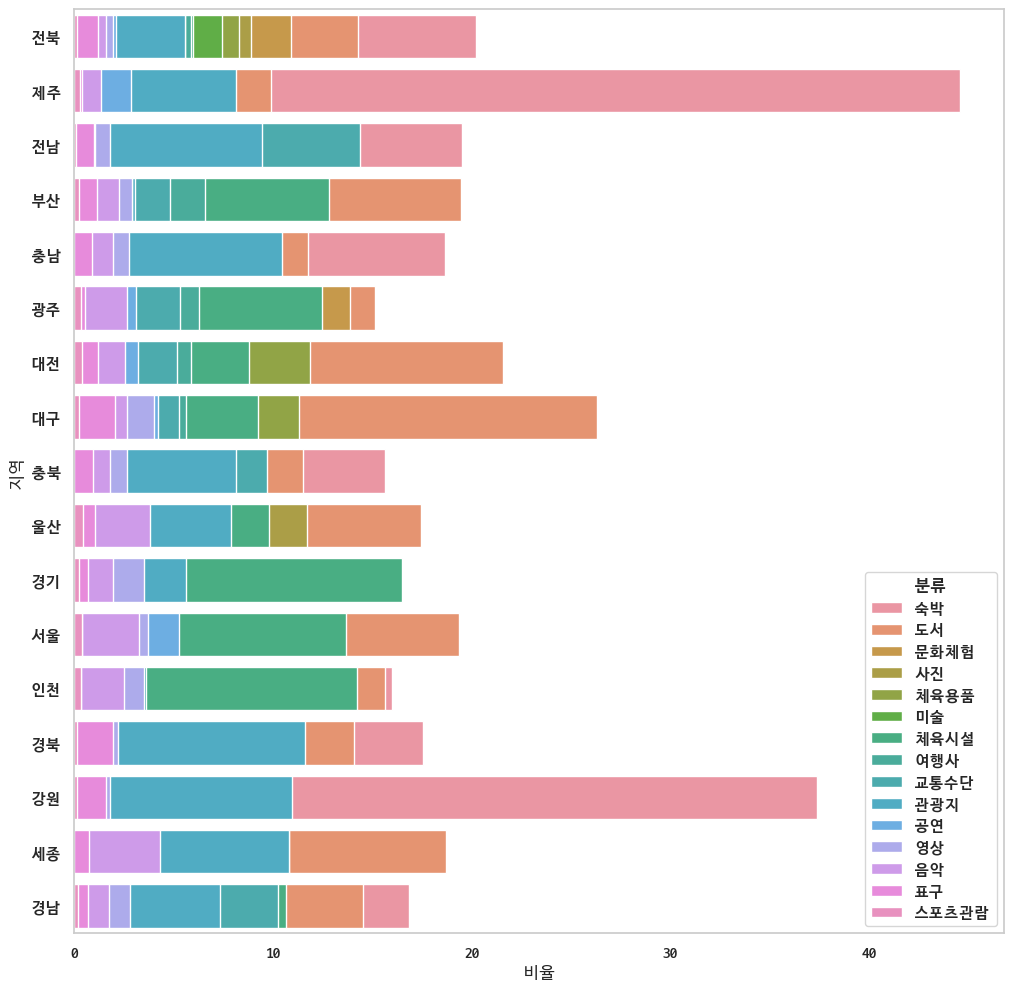

In [118]:
#지역별 분류 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="지역", x="비율", hue="분류", dodge=False)

#### 워드클라우드

In [9]:
!pip install konlpy

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl


In [11]:
market = nuri_offline.가맹점명   

In [68]:
#(,)㈜ 문자 제거
market=market.str.replace('(',' ').str.replace(')',' ').str.replace('㈜',' ')
market


C:\Users\user\AppData\Local\Temp\ipykernel_13596\182381112.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  market=market.str.replace('(',' ').str.replace(')',' ').str.replace('㈜',' ')


0                   한옥마을 아트홀
1                      경원장여관
2                   사단법인교동아트
3                   홍지서림 전주점
4                   포토젠 사진관 
                ...         
23479                  SM스포츠
23480                 자연스튜디오
23481                   포토엔젤
23482                 동서울터미널
23483    김해서부문화센터  재 김해문화재단 
Name: 가맹점명, Length: 23484, dtype: object

In [13]:
# 데이터 합치기
words = ' '.join(market)

In [ ]:
words

In [15]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    #print(mpl.font_manager.FontProperties(fname=font).get_name())
    print(font)
    mpl.font_manager.fontManager.addfont(font)

C:\python\fonts\D2Coding-Ver1.3.2-20180524.ttf
C:\python\fonts\GowunBatang-Regular.ttf
C:\python\fonts\GowunBatang-Bold.ttf
C:\python\fonts\NotoSansKR-Black.otf
C:\python\fonts\NotoSansKR-Bold.otf
C:\python\fonts\NotoSansKR-Regular.otf
C:\python\fonts\NotoSansKR-Thin.otf
C:\python\fonts\NotoSansKR-Light.otf
C:\python\fonts\D2CodingBold-Ver1.3.2-20180524.ttf
C:\python\fonts\NotoSansKR-Medium.otf


In [16]:
global_font = {'family':'Noto Sans KR','size' : 12 , 'weight':'bold'}

#폰트 설정
mpl.rc('font',**global_font)

#유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus=False)

#주피터 내부에 그림 표시 (magic명령)
%matplotlib inline

In [17]:
#폰트 설정
mpl.rcParams['font.family'] = 'Gowun Batang'
print(mpl.rcParams['font.family'])

['Gowun Batang']


In [18]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

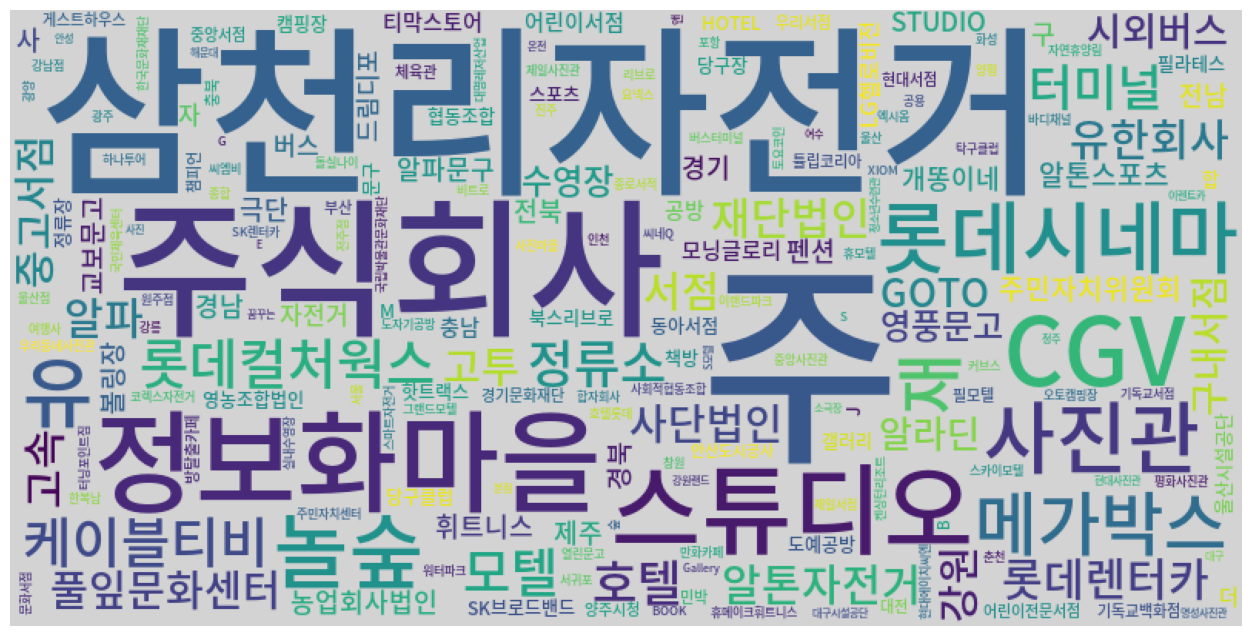

In [19]:
#import matplotlib.pyplot as plt
#한글 워드클라우드에서는 폰드 경로 한번더 입력!
wordcloud =  WordCloud(font_path='fonts/NotoSansKR-Medium.otf', 
                       collocation_threshold=int(1e6),
                       width=800, height=400,
                       background_color='lightgrey')

plt.figure(figsize=(16,8))
plt.axis('off')
plt.grid(False)
wordcloud.generate(words)
plt.imshow(wordcloud)
plt.savefig('cul_img')
plt.show()


## 네이버 크롤링

In [69]:
#!pip install selenium

In [70]:
from bs4 import BeautifulSoup
import requests

base_url = "https://search.naver.com/search.naver?where=view&sm=tab_jum&query="

keyword = input("검색어를 입력하세요 : ")

search_url = base_url + keyword

r = requests.get(search_url)

soup = BeautifulSoup(r.text, "html.parser")

items = soup.select(".api_txt_lines.total_tit")

nuri_word = []
for e, item in enumerate(items, 1):
    print(f"{e} : {item.text}")

검색어를 입력하세요 :  문화누리


1 : 문화누리카드 2023 자격 조건 신청 재충전 방법
2 : 문화누리카드 2023 발급, 사용, 사용처 총정리
3 : 문화누리카드 에버랜드 어플 사용 예약 결제방법 최대사용인원
4 : 문화누리카드 발급 및 신청방법 (사용처)
5 : 문화누리카드 사용처 생각보다 많아요
6 : 문화누리카드 신청대상, 지원금액, 사용처 등 총정리
7 : 문화누리카드 사용처 궁금하다면?
8 : 문화누리카드 사용처 알아보려면
9 : 문화누리카드로다양한 문화혜택을누리세요!
10 : 통합문화이용권 문화누리카드 신청 사용처 2023 영화 여행 체육 마음껏 누려라
11 : 문화누리카드 사용처 알아본다면!
12 : 문화누리카드 사용처와 신청방법 알아보기
13 : 문화누리카드 사용처
14 : [문화누리카드 여행][제천편] 한방과 청정자연의 도시 제천(당일)
15 : 문화누리 레일패스 이용법
16 : 문화누리카드 사용처 알아본다면!
17 : 문화누리카드 사용처 잔액조회 총정리
18 : 문화누리카드 사용처, 신청방법 확인
19 : 2023 문화누리카드 사용처, 신청 충전 잔액조회 합산 총정리
20 : 문화누리카드 온라인 사용등록 방법 | 사용기간
21 : 2023 문화누리카드 총정리
22 : [정책오디오] 우리의 삶을 윤택하게 해주는 문화생활, 문화누리카드 대상자 확대(2월2주)
23 : 문화누리카드 신청 대상 연간 11만원 지원 금액 사용처
24 : [용인시] ‘삶의질 복지’ 문화누리카드 신청하세요
25 : 2023 문화누리카드 신청대상 및 사용방법
26 : [물가백과] 문화누리카드 사용 가능 문구점 비교
27 : 문화누리카드 좋은점!!
28 : 문화누리카드 사용처 어디에 가능?
29 : 문화누리카드 온라인 및 발급조건에 관하여
30 : 문화누리카드 잔액조회 자동재충전 확인, 가맹점 정리


## 네이버 API

In [73]:
import numpy as np
import pandas as pd

import json
import os
import sys
import urllib.request

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [74]:
! pip3 install numpyencoder 

In [75]:
from numpyencoder import NumpyEncoder

In [76]:
#NAVER 데이터랩(검색어트렌드) - 통합검색어 트렌드 조회

class naverDataLabOpenAPI():
    '''
    네이버 데이터랩 오픈 API 컨트롤러 클래스
    '''
    
    def __init__(self, client_id, client_secret):
        '''
        인증키 설정 및 검색어 그룹 초기화
        '''
        self.client_id = client_id
        self.client_secret = client_secret
        self.keywordGroups = []
        self.url = url
        
    def add_keyword_groups(self, group_dict):
        '''
        검색어  그룹 추가
        self.keywordGroups 라는 빈 리스트가 생긴 상태
        검색어 그룹을 미리 Dictionary 객체에 정의한 후
        아래 메서드(def)를 통해 self.keywordGroups 리스트에 추가한다.
        '''
        keyword_group = {
            'groupName' : group_dict['groupName'],
            'keywords': group_dict['keywords']
        }
        
        self.keywordGroups.append(keyword_group)
        print(f'>>> Num of KeywordGroups: {len(self.keywordGroups)}')
        
    def get_data(self, startDate, endDate, timeUnit, device, ages, gender):
        '''
        데이터 요청 기능
        요청 파라미터 설정 후 아래 메서드에 입력하면
        DataFrame 형태로 데이터 불러올 수 있다.
        '''        
        
        #Request body
        body = json.dumps({
            'startDate': startDate,
            'endDate': endDate,
            'timeUnit': timeUnit,
            'keywordGroups': self.keywordGroups,
            'device': device,
            'ages': ages,
            'gender': gender
        }, ensure_ascii=False, cls= NumpyEncoder)
        
        #Results
        request = urllib.request.Request(self.url)
        request.add_header('X-Naver-Client-Id', client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)    
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            #Json result
            response_text = response.read()
            try:
                result = json.loads(response_text)
            except:
                print(response_text)
            
            df = pd.DataFrame(result['results'][0]['data'])[['period']]
            for i in range(len(self.keywordGroups)):
                tmp = pd.DataFrame(result['results'][i]['data'])
                tmp = tmp.rename(columns = {'ratio': result['results'][i]['title']})
                df = pd.merge(df, tmp, how='left', on=['period'])
            self.df = df.rename(columns={'period': '날짜'})
            self.df['날짜'] = pd.to_datetime(self.df['날짜'])
        else:
            print("Error Code:" + rescode)
        return self.df
    
    def plot_monthly_trend(self):
        '''
        월 별 검색어 트렌드 그래프 출력
        '''
        df = self.df.copy()
        df_0 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(0).reset_index().rename(columns={'날짜':'월'})
        df_1 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(1).reset_index().rename(columns={'날짜':'년도'})
        
        df = pd.merge(df_1[['년도']], df_0, how='left', left_index=True, right_index=True)
        df['날짜'] = pd.to_datetime(df[['년도','월']].assign(일=1).rename(columns={'년도':'year','월':'month','일':'day'}))
        
        colList = df.columns.drop(['날짜', '년도', '월'])
        n_col = len(colList)
        
        fig = plt.figure(figsize=(12,6))
        plt.title('월 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=df['날짜'], y=df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        
        return fig

In [77]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [88]:
#API 인증 정보 설정
client_id = "클라이언트 id"
client_secret = "클라이언트 secret"
url = "https://openapi.naver.com/v1/datalab/search"

In [83]:
#요청 파라미터 설정
#수정 가능합니다!
'''
startDate : str :조회 기간 시작 날짜 (yyyy-mm-dd 형식, 2016-01-01부터 가능)
endDate : str : 조회 기간 종료 날짜 (yyyy-mm-dd 형식)
timeUnit : str :구간 단위, date(일간)/week(주간)/month(월간)
device : str : 검색 환경 조건, 설정안함(모든환경)/pc(PC검색추이),mo(모바일검색추이)
ages : list : 검색 사용자의 연령, 설정안함(모든 연령), [1:11] 이런 식인 듯
    1: 0∼12세 / 2: 13∼18세 /3: 19∼24세 /4: 25∼29세/5: 30∼34세/6: 35∼39세
    7: 40∼44세/8: 45∼49세/9: 50∼54세/10: 55∼59세/11: 60세 이상
gender : 검색 사용자의 성별, 설정안함(모든 성별), m:남성, f:여성
'''
startDate = '2016-01-01'
endDate = '2023-03-17'
timeUnit = 'date'
device = ''
ages = []
gender = ''

In [84]:
'''
데이터 불러오기
검색어 그룹 세트 정의
여기를 수정하면 됩니다!!
'''

keyword_group_set = {
    'keyword_group_1': {'groupName': "공연", 'keywords': ['공연','뮤지컬','연극']},
    'keyword_group_2': {'groupName': "예술의전당", 'keywords': ["지니","Genie",'지니뮤직']},
    'keyword_group_3': {'groupName': "헬스", 'keywords': ["헬스장","헬스","PT"]},
    'keyword_group_4': {'groupName': "음악", 'keywords': ["멜론","지니","벅스"]},
    'keyword_group_5': {'groupName': "문화생활", 'keywords': ["문화생활","여가생활","문화"]},
}

In [85]:
#dataFrame 정의
#위에 거 수정 후 여기 거 실행하면 됩니다!!
naver = naverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

for key in keyword_group_set:
    naver.add_keyword_groups(keyword_group_set[key])
    
df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)
df

>>> Num of KeywordGroups: 1
>>> Num of KeywordGroups: 2
>>> Num of KeywordGroups: 3
>>> Num of KeywordGroups: 4
>>> Num of KeywordGroups: 5


,날짜,공연,예술의전당,헬스,음악,문화생활
0,2016-01-01,1.17211,2.26417,0.30908,9.15459,0.03384
1,2016-01-02,1.04237,2.26730,0.39618,9.26215,0.04298
2,2016-01-03,0.98346,2.25825,0.46597,9.19845,0.05334
3,2016-01-04,0.89749,2.39948,0.70257,9.16216,0.07074
4,2016-01-05,0.84702,2.33265,0.59728,8.83089,0.06604
...,...,...,...,...,...,...
2628,2023-03-13,1.53079,0.66646,1.42020,3.08700,0.11355
2629,2023-03-14,1.52905,0.62530,1.23755,2.97049,0.11434
2630,2023-03-15,1.55020,0.63104,1.15175,2.82961,0.10616
2631,2023-03-16,1.53384,0.60824,1.08344,2.83439,0.08901


In [86]:
df.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_13596\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


공연       1.095162
예술의전당    2.062662
헬스       0.727284
음악       7.330685
문화생활     0.077365
dtype: float64

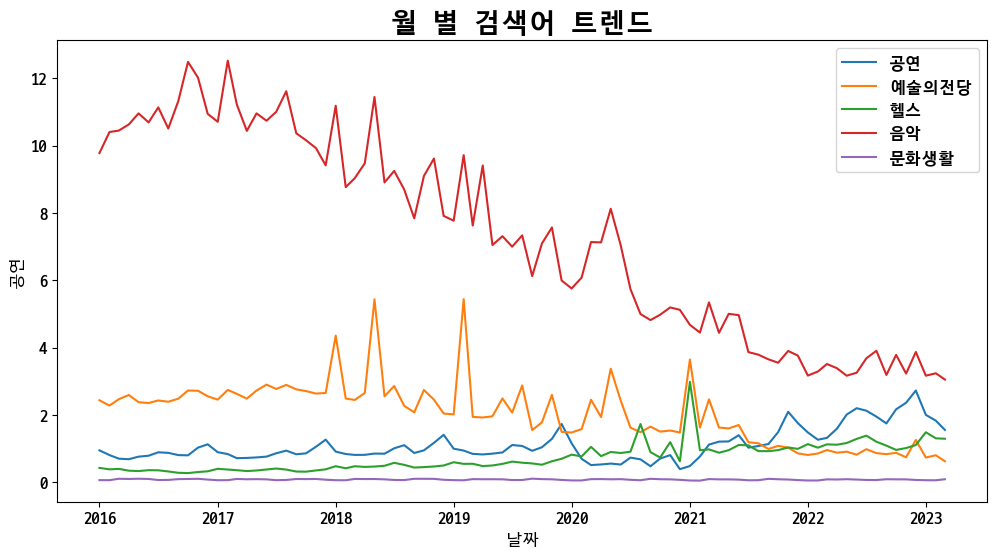

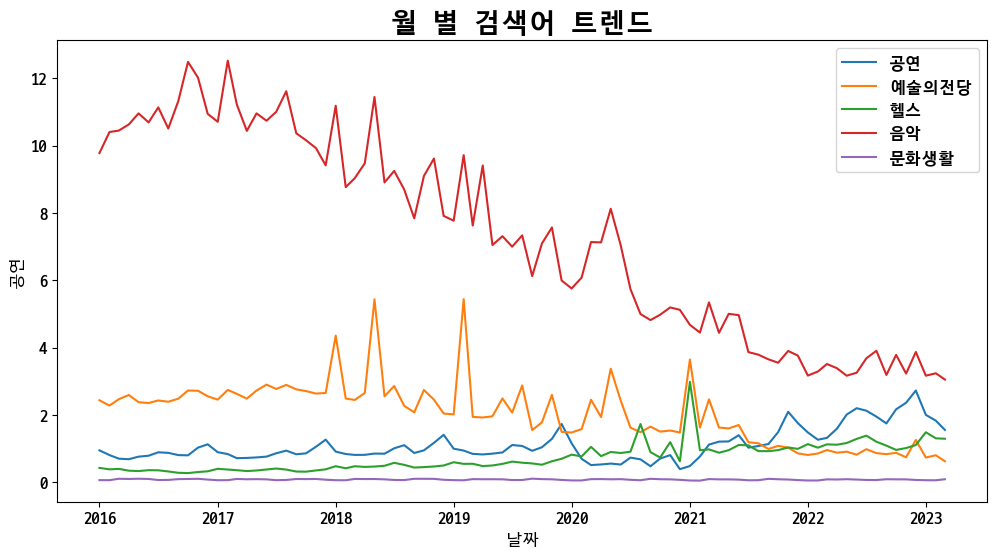

In [87]:
# 월별 검색어 트렌드 꺾은선 그래프인데
# 일단 예시입니다 '3'
naver.plot_monthly_trend()